# [SOC-5] Lecture 17: Descriptive Bivariate Statistics
 
---

![](jupyter-header-1.png)


### Professor David Harding

#### Understanding Bivariate Relationships:

We can conduct bivariate anylsis to:
1. Understand how two variables are associated
2. Describe subgroups by comparing means across values of a categorical variable (what the textbook calls a "conditional" mean)

We will do this through two main methods:
1. Cross-Tab - for categorical variables (nominal, ordinal)
2. Correlation - for continuous variables (interval, ratio)

#### Data Types:

The main data types are: **Continuous** and **Categorical**. Categorical data can be further split into **Nominal** and **Ordinal** variables, and continuous can be split into **Interval** and **Ratio**.


---

### Topics Covered
- Associations
- Correlation and Scatter Plot
- Regression line, Intercept and Slope
- A brief intro to Sampling Error


### Table of Contents

[The Data](#data)<br>

<!--[Context](#context)<br>-->

1 - [Variable Associations Using Cross-Tab Analysis](#1)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 - [Intro - Interpreting Cross-Tab](#s0)


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 - [Positive and Negative](#s1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3 - [Strong and Weak](#s2)


2 - [Correlation](#2)<br>

3 - [Regression Line](#3)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1 - [Intercept and Slope](#s5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2 - [Regression Examples](#s7)


4 - [Sampling Error](#4)<br>


 The code in this notebook is hidden for readability. If you would like to look at the code, click the button below.

<div class="alert alert-warning">
In order to make sure that all of the interactive widgets appear, please click "Kernel" in the top bar, then select "Restart & Run All", then confirm "Restart and Run All Cells". This will hide all of the code cells, but if you want to look at the code come back to the cell below and click the button.
</div>


In [1]:
from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:1" type="submit" value="Click here to reveal the raw code."></form>''')

#derived from the style modules notebook (by Keeley Takimoto)

In [2]:
hide_me

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
from numpy import arange,array,ones
#from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## The Data <a id='data'></a>

In this notebook, we will again be working with the data from the <a href="https://gss.norc.org">General Social Survey</a>. 

Let's take a look at the data! This is just the first five respondents. Respondents are in rows and variables are in columns. This is a very small subset of all the variables in the GSS. 

In [3]:
hide_me
gss = pd.read_csv('cleaned_data.csv', index_col = 0)
gss.head(5)

#.head(5) just means that I only want for this cell to output 5 top rows of our table

,YEAR,REALINC ($),TVHOURS,POLHITOK,CLASS,HAPPY,VISIONS,ESP,DEJAVU,REGION,RACE,DEGREE,EDUC,CHILDS,SIBS,HRS1,REALRINC
0,1972,18951.0,NaN,Not applicable,Middle class,Not too happy,Not applicable,Not applicable,Not applicable,E. nor. central,White,Bachelor,16.0,0.0,3.0,NaN,0.0
1,1972,24366.0,NaN,Not applicable,Middle class,Not too happy,Not applicable,Not applicable,Not applicable,E. nor. central,White,Lt high school,10.0,5.0,4.0,NaN,0.0
2,1972,24366.0,NaN,Not applicable,Working class,Pretty happy,Not applicable,Not applicable,Not applicable,E. nor. central,White,High school,12.0,4.0,5.0,NaN,0.0
3,1972,30458.0,NaN,Not applicable,Middle class,Not too happy,Not applicable,Not applicable,Not applicable,E. nor. central,White,Bachelor,17.0,0.0,5.0,NaN,0.0
4,1972,50763.0,NaN,Not applicable,Working class,Pretty happy,Not applicable,Not applicable,Not applicable,E. nor. central,White,High school,12.0,2.0,2.0,NaN,0.0


### Data Dictionary

|Variables |Definition |
|-----------|---------------------|
|Year |GSS year for this respondent |
|REALINC ($)	 |Family income|
|TVHOURS |Hours per day watching TV|
|POLHITOK |Ever approve of police striking citizen|
|CLASS |Subjective class identification|
|HAPPY |General happiness|
|VISION |Perceived events at great distance|
|ESP |Felt in touch with someone far away|
|DEJAVU |Thought one was someplace before|
|REGION |Region of interview|
|RACE |Race of respondent|
|DEGREE |Respondent's highest earned degree|
|EDUC |Highest year of school completed|
|CHILDS |Number of children|
|SIBS |Number of brothers and sisters|
|HRS1 |Number of hours worked last week|
|REALRINC |Respondent's income|

---

## Variable Associations <a id='1'></a>

What is a Cross-Tab and how does it help us see the relationship between two variables?
 

---
##  Intro - Interpreting Cross-Tab <a id='s0'></a>

### 1) Cross-Tab: Race and Hapiness

### (a)
Let's begin by exploring the variables RACE and HAPPY. We will start by creating a cross-tab that simply contains the number of respondents who fall into each cell, or what we might call the "raw counts" or "raw frequencies." Then we will see cross-tabs with percentages rather than raw counts. 

* Notice that there are no percentages and no totals displayed on the first table below. 

In [4]:
hide_me
happy = gss.loc[((gss['HAPPY'] != "Don't know") & (gss['HAPPY'] != "No answer") & \
                 (gss['HAPPY'] != "Not applicable"))]

happiness = pd.crosstab(happy.HAPPY, happy.RACE)
happiness = happiness.reindex(['Other', 'Black', 'White', 'All'], axis="columns")


happiness.drop(["All"],axis=1)

RACE,Other,Black,White
HAPPY,,,
Not too happy,497,1772,5399
Pretty happy,1765,4764,27034
Very happy,933,1907,15983


Now let's look at the percentages. 

Percentage of people in each HAPPY category for each RACE.

In [5]:
hide_me
happy = gss.loc[((gss['HAPPY'] != "Don't know") & (gss['HAPPY'] != "No answer") & \
                 (gss['HAPPY'] != "Not applicable"))]

happiness = pd.crosstab(happy.HAPPY, happy.RACE, margins=True, normalize = True)
happiness = happiness.reindex(['Other', 'Black', 'White', 'All'], axis="columns")


happiness.div(happiness.iloc[:,-1], axis=0)*100 

RACE,Other,Black,White,All
HAPPY,,,,
Not too happy,6.481481,23.109025,70.409494,100.0
Pretty happy,5.258767,14.194202,80.547031,100.0
Very happy,4.956702,10.131222,84.912076,100.0
All,5.320212,14.059014,80.620775,100.0


<div class="alert alert-info">
<b> Question:</b> 
How easy is it to tell from these percentages whether there is a relationship between HAPPY and RACE? Why? Think of what the percentages represent.

</div> 

*Double click this cell to begin typing your answer*

### (b)
Now, let's continue to explore the same two variables, but now RACE will be on the Y axis and HAPPY will be on the X axis. In this cross-tab we can notice the increase in happiness and lack of it from **left to right** columns (it changes within race).

* Notice that the values in the table are percentages, as in the previous table, but they are different.

In [6]:
hide_me
happy = gss.loc[((gss['HAPPY'] != "Don't know") & (gss['HAPPY'] != "No answer") & \
                 (gss['HAPPY'] != "Not applicable"))]

happiness = pd.crosstab(happy.RACE,happy.HAPPY, margins=True, normalize = True)
happiness = happiness.reindex(['Other', 'Black', 'White', 'All'], axis="rows")




happiness.div(happiness.iloc[:,-1], axis=0)*100


HAPPY,Not too happy,Pretty happy,Very happy,All
RACE,,,,
Other,15.555556,55.242567,29.201878,100.0
Black,20.987801,56.425441,22.586758,100.0
White,11.151272,55.836913,33.011814,100.0
All,12.768508,55.888034,31.343458,100.0


<div class="alert alert-info">
<b> Question:</b> 
Now study the cross-tab above. Is it easier to see how the two variables are related here? Why or why not? 
    
    
Hint: [Take a second to compare this cross-table with the one above. How does the interpretation of the relationship between these two variables change?]

<div/>

*Double click this cell to begin typing your answer*

Takeaway: Whenever you create a cross table you should think about which variable will be on the X and Y axis, and whether you will need row or column percentages.


---
##  Cross-Tab:  Positive and Negative Relationships <a id='s1'></a>
Now we'll look at the **direction** of the relationship (positive vs. negative).

### 1) Positive: DREGREE and REALRINC

### (a) Raw Counts 

We will begin breaking down the variable REALRINC into six categories. Namely, we wil have
* $<\$20K,\$20K-\$40K,\$40K-\$60K,\$60K-\$80K,\$80K-\$100K,and >\$100K$

for our categories.

Just as before, we removed values where the response was "Don't Know" or "No answer".

Now that the pre-cleaning and categorizing is done, we will begin by showing a cross-tab of raw counts. 

In [7]:
hide_me

degree = gss.copy()
degree["Incomes"] = pd.cut(degree.REALRINC, bins=[-1, 20000, 40000, 60000, 80000, 100000, np.inf],\
                          labels=['<$20K','$20K-40K','$40K-60K','$60K-80K', '$80K-100K', '>$100K'])

#degree.head()
#degree.fillna(0,inplace=True)

degree_income = pd.pivot_table(degree, index='DEGREE', columns='Incomes', values = "RACE",aggfunc="count").\
               reindex(["Lt high school", "High school", "Junior college", "Bachelor", "Graduate"])
degree_income



Incomes,<$20K,$20K-40K,$40K-60K,$60K-80K,$80K-100K,>$100K
DEGREE,,,,,,
Lt high school,12545.0,892.0,100.0,15.0,19.0,16.0
High school,26569.0,5449.0,810.0,104.0,115.0,148.0
Junior college,2510.0,948.0,155.0,22.0,10.0,23.0
Bachelor,5475.0,2680.0,754.0,178.0,149.0,239.0
Graduate,2045.0,1446.0,622.0,158.0,156.0,289.0


<div class="alert alert-info">
<b> Question:</b> 
Can you tell anything about the relationship by just looking at the raw counts?
</div>    

*Double click this cell to begin typing your answer*

### (b) Row Percentages 


Now let's look at the row percentages!

Percentage of people in each degree level in each income category.

* Notice that this table just shows us percentages.
* Notice also that the rows sum to 100 percent

In [8]:
hide_me
degree["Degree"] = gss["DEGREE"]
degree_income = pd.pivot_table(degree, index='DEGREE', columns='Incomes', values = "Degree",aggfunc="count",margins=True).\
               reindex(["Lt high school", "High school", "Junior college", "Bachelor", "Graduate"])

degree_income.div(degree_income.iloc[:,-1], axis=0)*100 

Incomes,<$20K,$20K-40K,$40K-60K,$60K-80K,$80K-100K,>$100K,All
DEGREE,,,,,,,
Lt high school,92.330905,6.565099,0.735998,0.110400,0.139840,0.117760,100.0
High school,80.039163,16.415123,2.440127,0.313300,0.346438,0.445850,100.0
Junior college,68.429662,25.845147,4.225736,0.599782,0.272628,0.627045,100.0
Bachelor,57.783641,28.284960,7.957784,1.878628,1.572559,2.522427,100.0
Graduate,43.363020,30.661578,13.189143,3.350297,3.307888,6.128075,100.0


<div class="alert alert-info">
<b> Question:</b> 
Now that we have the added the row percentages, What can you conclude about the relationship between the variables? 
    </div>    

*Double click this cell to begin typing your answer*

### (c) An alternative: conditional means


Notice that above we used the income variable as an ordinal variable by breaking it into categories. That was necessary for the cross-tab. We can also keep it as a ratio variable and look at the mean of income by groups defined by other variables. Now let's visualize that data! We chose a barplot that utilizes vertical bars. This type of visualization is useful when you want to compare categorical and continuous variables.

* This plot displays mean yearly income by degree.

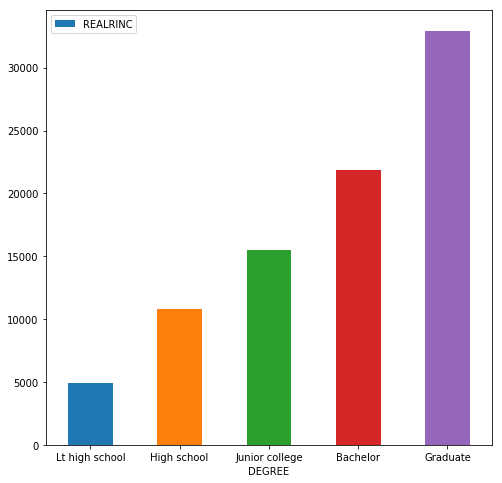

In [9]:
hide_me
 
# Plot 1   
#chart = sns.catplot(x='DEGREE', y='REALRINC', data=degree,order=["Lt high school", "High school", "Junior college", "Bachelor", "Graduate"]);

#chart.set_xticklabels(rotation=30)

#plot 2

recent_years = gss[gss["YEAR"] > 1970]
degree_income = recent_years[['DEGREE', 'REALRINC']].groupby('DEGREE').mean()
degree_income.insert(0, "Values", [3, 5, 4, 1, 2, 0, 6], True)
degree_income = degree_income.sort_values(by='Values')
degree_income.reset_index(level=0, inplace=True)
degree_income = degree_income[degree_income.DEGREE != "Don't know"].drop(['Values'], axis=1)
degree_income = degree_income[degree_income.DEGREE != "No answer"]

degree_income.plot.bar(x='DEGREE', y='REALRINC', rot=0, figsize=(8, 8))

<div class="alert alert-info">
<b> Question:</b> 
Study the barplot. Do you think, just by looking at the plot we can tell whether there's a strong relationship between a person's highest degree and their yearly income? Why or why not?
</div>    

*Double click this cell to begin typing your answer*

### 2) Negative Relation : HAPPY and TVHOURS

In this section we will explote the relationship between happiness level (HAPPY) and the number of hours spent watching TV per day (TVHOURS).

* We will begin by dropping some values. We dropped "Don't know", No answer", Not applicable", and "Pretty happy" in the variable HAPPY. Now we will only work with two values: "Not too happy" and "Very happy".

In [10]:
hide_me
tv_happy = gss.loc[((gss['HAPPY'] != "Don't know") & (gss['HAPPY'] != "No answer")\
                      & (gss['HAPPY'] != "Not applicable") & (gss['HAPPY'] != "Pretty happy"))] 
tv_happy['tv_week'] = pd.cut(x = tv_happy['TVHOURS'], bins=[-1, 5, 10, 15, 20, 25],\
                                        labels = ["<5 hrs", "5-10 hrs", "10-15 hrs", "15-20 hrs", "20-25 hrs"])
tv_happy = pd.crosstab(tv_happy.tv_week, tv_happy.HAPPY, margins=True, normalize = True).round(4)*100

100 * tv_happy.div(tv_happy["All"], axis = 0) 

HAPPY,Not too happy,Very happy,All
tv_week,,,
<5 hrs,25.321409,74.667412,100.0
5-10 hrs,44.596132,55.403868,100.0
10-15 hrs,51.562500,48.437500,100.0
15-20 hrs,54.545455,45.454545,100.0
20-25 hrs,62.500000,37.500000,100.0
All,27.510000,72.490000,100.0


Notice that "Not too happy" and "Very happy" are the only two values. This means that a decrease in one directly correspondes with an increase in the other. 

<div class="alert alert-info">
<b> Question:</b> 
Is there a **positive** or **negative** relationship between TVHOURS and HAPPY? HINT: How does the happiness level change as the number of TV Hours changes?

Bonus Question: Can we necessarily conclude from these data that TVHOURS causes HAPPY? (think about the criteria for causality)?
</div>    

*Double click this cell to begin typing your answer*

---
##  Cross-Tab:  Strong and Weak <a id='s2'></a>
When we we say, "what is the **strength** of the relationship?", what we are really asking is **"how well does one variable predict the other?"** In other words, if you knew a respondent's value on one variable, how good a job could you do guessing their value on the second variable? If two variables are strongly related, then one variable is a better predictor the other variable, compared to when the two variables are only weakly related. Let's walk you through some examples to try to get the idea.

### 1)  Strong Relation : RACE and DEGREE

In this section below we will explore the variables RACE and DEGREE.

What is the relationship between RACE and DEGREE? We can look at this with a cross-tab of RACE by DEGREE.  

* We removed cases where the DEGREE responses were "Don't Know" or "No answer"
* Notice that the numbers in the table are precentages. Although the row totals are not shown, the percentages sum to 100 across rows. 

In [11]:
hide_me
dr = gss.loc[((gss['DEGREE'] != "Don’t know") & (gss["DEGREE"] != "No answer"))]
degree_race = pd.crosstab(dr.RACE, dr.DEGREE, normalize = "index", margins=True).round(4)*100
degree_race = degree_race.reindex(["Lt high school", "High school", "Junior college", "Bachelor", "Graduate"], \
                 axis="columns")

degree_race 

DEGREE,Lt high school,High school,Junior college,Bachelor,Graduate
RACE,,,,,
Black,29.49,51.64,6.17,8.76,3.86
Other,27.07,42.01,6.36,15.25,9.26
White,19.10,51.92,5.54,15.65,7.76
All,21.01,51.33,5.67,14.65,7.29


<div class="alert alert-info">
<b> Question:</b> 
Would you say that there is a strong relationship between these variables? Why

<b> Another Question:</b> 
Does it make sense to ask whether this relatinship is positive or negative? HINT: Which type of variable is RACE: ordinal or nominal?
     
<div/>

*Double click this cell to begin typing your answer*

### 2)  Weak Relationship: CHILDS and HRS1

We will now explore the associations between the number of children (CHILDS) and the number of hours worked last week (HRS1).

* We grouped CHILDS into 4 categories,("1 or None", "2 or 3", "4 or 5", "more than 5") and
* HRS1 into 6 categories ("<15", "15-30", "30-45","45-60", "60-75", ">75").

In [12]:
hide_me
gss["childs"] = pd.cut(x = gss["CHILDS"], bins=[-1, 1, 3, 5, 7],\
           labels = ["1 or None", "2 or 3", "4 or 5", "more than 5"])
gss["Hours worked per week"] = pd.cut(x = gss["HRS1"], bins=[-1, 15, 30, 45, 60, 75, 90], \
              labels=["<15","15-30","30-45","45-60", "60-75", ">75"])
work_child = pd.pivot_table(gss, index = "childs", columns = "Hours worked per week", values = "CHILDS",\
                            aggfunc = "count", margins=True)
work_child.div(work_child.iloc[:,-1], axis=0)*100



Hours worked per week,<15,15-30,30-45,45-60,60-75,>75,All
childs,,,,,,,
1 or None,4.339317,12.620925,54.946038,22.216630,3.998211,1.878879,100.0
2 or 3,5.388346,12.583881,52.395190,23.134675,4.358514,2.139393,100.0
4 or 5,5.823864,14.886364,51.221591,20.738636,4.545455,2.784091,100.0
more than 5,6.338028,17.464789,51.126761,18.169014,4.366197,2.535211,100.0
All,4.202992,4.942956,12.913034,53.487246,22.371112,2.082661,100.0


<div class="alert alert-info">
<b> Question:</b> 
Do you see a relationship between the variables? How do you know?

<b> Follow-up Question:</b> Do you think that the way we grouped the variables into categories affected the conclusions? Would you have grouped it differently?

 </div>  

*Double click this cell to begin typing your answer*

--- 

## Correlation <a id='2'></a> 

### The correlation coefficient - r
* r is a numerical measure of correlation ranging from -1 to 1. It gives us information about the strength and direction of the relationship between two continuous (interval or ratio) variables.
* Although there are different types of correlation, we will use "Pearson's correlation" or "Pearson's R".

#### How to interpret r
* r = 1: a perfect positive relationship
* r = -1: a perfect negative relationship
* r = 0: no relationship at all

These are some examples of different correlations, r:


![](correlation-examples.svg) 

If you would like to learn more about how to calculate the corraltion coefficient please visit https://www.inferentialthinking.com/chapters/15/1/Correlation for more details, but you won't be responsible for that in this course.

---

## Intercept and Slope: Bivariate Regression Line <a id='3'></a>

### What is a regression line?
* Linear regression allows us to examine the relationships between two or more varaibles. 
    * For the purpose of this notebook we will only be working with two. Namely X-independent variable and Y-dependent variable.
* Linear regression allows us to predict one variable from another. In this case we will predict Y from X.
* There are many predictive models that help us estimate the relationships in our data. However, the goal of a simple linear regression is to create a linear model that minimizes the sum of squared errors. Making it the line with the "best fit" of all possible lines we could draw.
    * The error represents how far off our obervations (real data) are from our predicted values (data from our model).
    * For instance, if we had a data point, say with a Y value of 5, and our model predicted that it would be 7. Our squared error would be (5-7)^2= 4.
    
    
![](residuals.png) 

### The linear regression line as an equation   <a id='s5'></a>
First some definitions:

General format: $Y_i =\beta_0 +\beta_1Xi+\epsilon_i$ but when we are doing simple linea rgression we write it like this $E(Y_i) =\beta_0 +\beta_1Xi$, which is the mean of y, for a given x.

$Y_i$: Dependent variable (also called response or outcome variable)

$\beta_0$: Intercept (*intepretation:* the value of Y when X is zero)

$\beta_1$: Slope (*intepretation:* the change in Y corresponding to a one unit change in X)

$\epsilon_0$: Error (unexplained variation in Y, also called a "residual")

source: https://www.inferentialthinking.com/chapters/15/2/Regression_Line

source: http://statisticsbyjim.com/regression/interpret-r-squared-regression/

source: http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

---

--- 

### Example equation


![](father_son.png) 

* Notice that in order to find a line that helps us predict values, all we need to do is find the slope and intercept.
* In this example, the regression line predeicts the son's height from the father's height.
* The equation for the regression line would look like:

$SONH_i= \beta_0 + \beta_1 FATHERHA + \epsilon_i$

source: https://galton.uchicago.edu/~wichura/Stat200/Handouts/C10.pdf


--- 


---
## Regression Examples:  <a id='s7'></a>


### 1) Positive Relationship

In the scatterplot below we will compare a respondent's personal income with their family income. We can see that the relationship between the two values is positive (the regression line is going up from left to right). Each dot represents data from one respondent.


Scatter plot of respondent's income (REALRINC) and family income (REALINC ($)).

Text(0, 0.5, 'Personal Income')

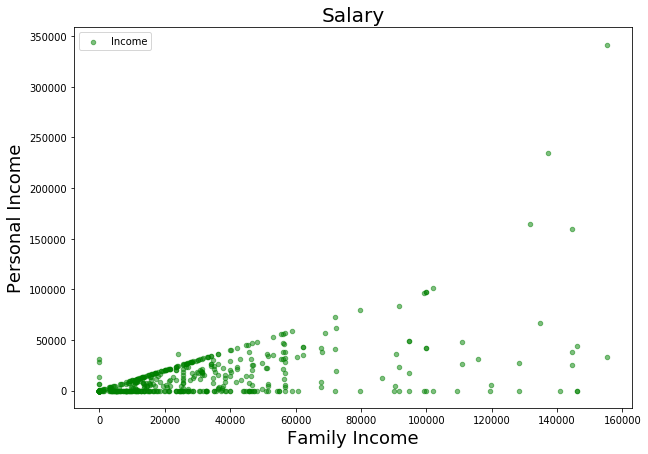

In [13]:
hide_me
sample_salary = gss.sample(500)
sample_salary.plot(kind='scatter', x='REALINC ($)', y='REALRINC', color='green',alpha=0.5, figsize=(10,7))
plt.legend(labels=['Income'])
plt.title('Salary', size=20)
plt.xlabel('Family Income', size=18)
plt.ylabel('Personal Income', size=18)

Now let's add the regression line for respondent's income (REALRINC) and family income (REALINC).

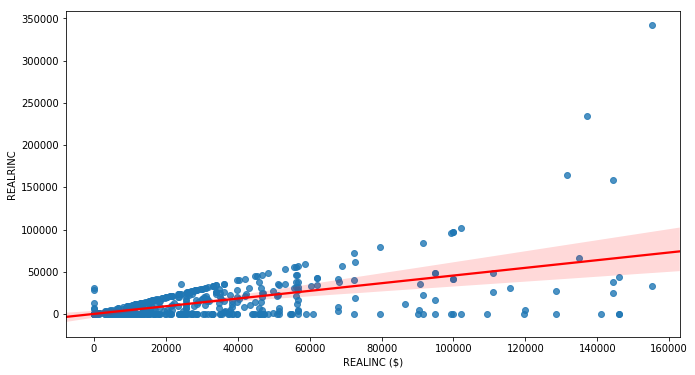

In [14]:
hide_me
#sns.regplot(x='REALINC ($)', y='REALRINC', data = sample_salary, line_kws={'color': 'red'}).figure.set_size_inches(11, 6)
sns.regplot(x='REALINC ($)', y='REALRINC', data =sample_salary , line_kws={'color': 'red'}).figure.set_size_inches(11, 6)



#resp_fam_corr = gss['EDUC'].corr(gss['YEAR'], method ='pearson')
#resp_fam_corr 

<div class="alert alert-info">
<b> Question:</b> 

We have seen relationships before, but in cross-tabs. Can you tell just by looking at the plot whether the relationship between variables is positive or negative? Strong or weak?
</div>    

*Double click this cell to begin typing your answer*

### 2) Negative Correlation

Scatter plot of number of hours worked last week (HRS1) and number of hours watching TV (TVHOURS).

Text(0, 0.5, 'Work Hours')

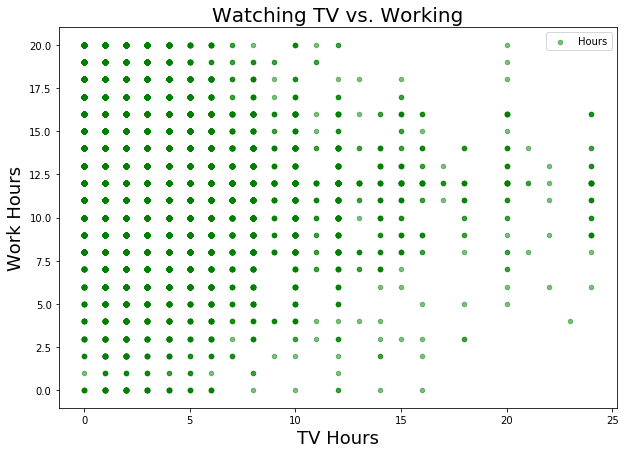

In [15]:
hide_me
gss.plot(kind='scatter', x='TVHOURS', y='EDUC', color='green',alpha=0.5, figsize=(10,7))
plt.legend(labels=['Hours'])
plt.title('Watching TV vs. Working', size=20)
plt.xlabel('TV Hours', size=18)
plt.ylabel('Work Hours', size=18)

<div class="alert alert-info">
<b> Question:</b> 

Based on the above scatteplot, can you tell whether the relationship is positive or negative? Strong or Weak? Why or why not?

</div>    

*Double click this cell to begin typing your answer*

Now let's add the regression line for number of hours worked last week (HRS1) and number of hours watching TV (TVHOURS).

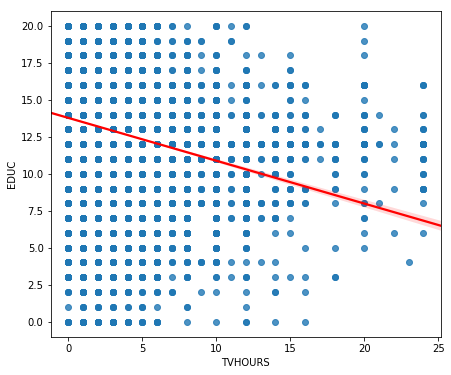

In [16]:
hide_me
sns.regplot( x='TVHOURS', y='EDUC', data = gss, line_kws={'color': 'red'}).figure.set_size_inches(7, 6)

<div class="alert alert-info">
<b> Question:</b> 
Is there a positive or negative relationship? Strong or weak? <br>


<b> Follow-up Question:</b> 
Can you guess what the intercept and slope are from the graph?

</div>    

*Double click this cell to begin typing your answer*

---

## Brief Introduction to Sampling Error <a id='4'></a>



We collect data on a sample (subset) of the population we are interested in because it is usually too expensive to collect data on every member of the population. For example, the GSS is a sample of the US population in each survey year. It would be impossible to collect data from everyone in the United States. <p>

If we take a random sample, we usually assume that the sample is representative of the population. That means that any statistic we calcaulte from the sample will approximate the corresponding number ("parameter") in the population. For example, if we calculate the mean family income in the sample, we expect that it will be a good approximation of the mean family income in the population as a whole. But is this always true? <p>
    
Any particular sample may not be perfect representation of the population. This is called **sampling error**. Just by chance, we could get a smaller or larger number for the mean of family income, or any other statistic we want to calculate.<p>
    
In this section, we will illustrate this idea by pretending that the GSS data are actually the population (not a sample). We will draw small random samples (of 300 people) from the GSS data and see how the mean of family income differs between the sample and the overall GSS, our pretend population. <p>

Then we will also look at how much variation there is across these random samples. That will give us a good sense of how much sampling error there might be in any one sample of that same size. 

Let's first draw our sample of 300 from the GSS. The data from the first five respondents in the new sample follow. 

In [17]:
hide_me
our_sample = gss.sample(300, replace = False)
our_sample.head()

,YEAR,REALINC ($),TVHOURS,POLHITOK,CLASS,HAPPY,VISIONS,ESP,DEJAVU,REGION,RACE,DEGREE,EDUC,CHILDS,SIBS,HRS1,REALRINC,childs,Hours worked per week
25798,1990,39919.00,2.0,Not applicable,Working class,Very happy,Not applicable,Not applicable,Not applicable,Pacific,White,High school,12.0,2.0,7.0,46.0,39919.00,2 or 3,45-60
7535,1976,25465.00,NaN,No,Middle class,Very happy,Not applicable,Not applicable,Not applicable,South atlantic,White,Bachelor,16.0,1.0,5.0,50.0,9167.00,1 or None,45-60
58308,2014,11233.75,NaN,Don't know,Working class,Pretty happy,Not applicable,Not applicable,Not applicable,E. nor. central,Other,Lt high school,5.0,3.0,8.0,NaN,7686.25,2 or 3,NaN
43664,2002,23463.75,2.0,Yes,Working class,Pretty happy,Not applicable,Not applicable,Not applicable,Middle atlantic,White,Bachelor,16.0,0.0,2.0,40.0,0.00,1 or None,30-45
2222,1973,45866.00,NaN,Yes,Working class,Pretty happy,Not applicable,Not applicable,Not applicable,Mountain,White,Lt high school,11.0,0.0,4.0,40.0,0.00,1 or None,30-45


If we look at the mean family income from our initial data and the sample, we can see that they are different.

(Note: the mean family income in the sample will be changing every time we rerun the cells above and under, but the median salary from our original data will always stay the same).

In [18]:
hide_me
pop_mean = gss['REALINC ($)'].mean()
print("Our population:", pop_mean)
print("One sample:", our_sample['REALINC ($)'].mean())

Our population: 28523.42469675533
One sample: 30034.72268066667


Now let's do a thought experiment where we imagine taking a sample of size 300 many times, and in each sample calculate the mean family income. We will do this 1000 times, find the mean family income in each sample, and create a new dataset with these 1000 values for the mean of family income.

In [19]:
hide_me
sample_means = []

for i in np.arange(1000):
    new_sample = gss.sample(300, replace = False)
    new_mean = new_sample['REALINC ($)'].mean()
    sample_means = np.append(sample_means, new_mean)
    
print("These are the first 10 means in our list (of 1000 means)")
print(f'{sample_means[:10]}')
print("Observe that each of the values is different. This is because we are taking random samples from the GSS data")

These are the first 10 means in our list (of 1000 means)
[28744.26639133 29002.79366167 26368.39747867 28187.63294067
 28928.554053   29577.53204533 29417.49698533 29729.45750833
 28249.666844   32193.03930433]
Observe that each of the values is different. This is because we are taking random samples from the GSS data


In the histogram below, we now plot *all* the mean family incomes from our "resampling" procedure. The red line represents the median salary from the original GSS data. 

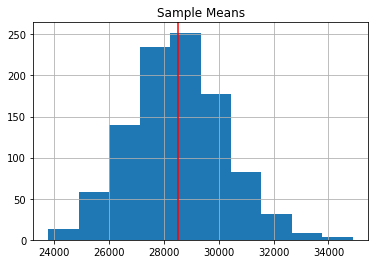

In [20]:
hide_me
samples = pd.DataFrame(data = sample_means, columns = ['Sample Means'])
samples.hist()
plt.axvline(pop_mean, c='red')

We can see that most of the means are concentrated between approximately 26,000 and 30,000, in other words, within +/- 2,000 from our actual mean in the "population." But there also are some values that are located even further away and do not seem to close at all to the population mean indicated by the red line. In other words, sometimes our sample can produce a very bad estimate of what is happening in the population. Statisticians have figured out how to put a number on how much such sampling error to expect. This is called the **margin of error**, and it can be used to create a **confidence interval**, the range of values we are confident that the true population value lies within. We will be learning about that in the next lecture.

---
**Congratulations on finishing this notebook!**

To transform this notebook into a PDF, simply navigate to **"File"** on the upper-left corner > **"Download as"** > **"PDF via Chrome"**. This will directly download the file for you for easier access throughout the semester. 

![](navigate.png)

---
## Bibliography

---
Notebook developed by: Kseniya Usovich

Edited by: Karla Palos Castellanos

Data Science Modules: http://data.berkeley.edu/education/modules